<h1 style="color:blue;text-align:center">  K-Nearest Neighbor (KNN) </h1>

<h3 style="color:black;text-align:center"> 賴志宏 Chi-Hung Lai    <br />
created date: 2019.11.13, &emsp;  Last modified date: 2022.05.22

#  Content of Table

1. Introduction
 1.1 Functions of KNN
 1.2 Visualizaion of KNN   
 1.3 Calculation of distance  
 1.4 Algorithm of KNN    
2. KNN in scikit learn  
 2.1 sklearn.neighbors.KNeighborsClassifier( )  
  2.1.1 Steps of KNeighborsClassifier( )   
  2.1.2 Parameters of KNeighborsClassifier( )    
  2.1.3 Get the k-nearest nodes  
 2.2 Simulation & figures  
  2.2.1 make_blobs( )   
  2.2.2 KNN figures   
3. Verify accuracy of data  
 3.1 sklearn datasets  
 3.2 Accuracy  
4. Model creation & prediction  
 4.1 Training data & testing data   
 4.2 Choice of K value  
5. K-fold Cross Validation 

<h1 style="color:blue"> 0. Prior Knowledge </h1>

### - Machine learning
- https://www.javatpoint.com/machine-learning
### - How does Machine Learning work
- https://www.javatpoint.com/machine-learning

### - Classification of Machine Learning
- https://www.javatpoint.com/machine-learning
- https://www.javatpoint.com/supervised-machine-learning
- https://www.javatpoint.com/unsupervised-machine-learning

<h1 style="color:blue"> 1. Introduction </h1>

## 1.1 Functions
- K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
- K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
- K-NN algorithm stores all the available data and classifies a new data point based on the similarity. 

### Advantages of KNN Algorithm:
- Simple to implement.
- Robust to the noisy training data
- More effective if the training data is large.

### Disadvantages of KNN Algorithm:
- Always needs to determine the value of K which may be complex some time.
- The computation cost is high because of calculating the distance between the data points for all the training samples.
- Each time to classify an unlabeled sample, it needs to recompute all over again


- https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

## 1.2 visualizaion of KNN

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


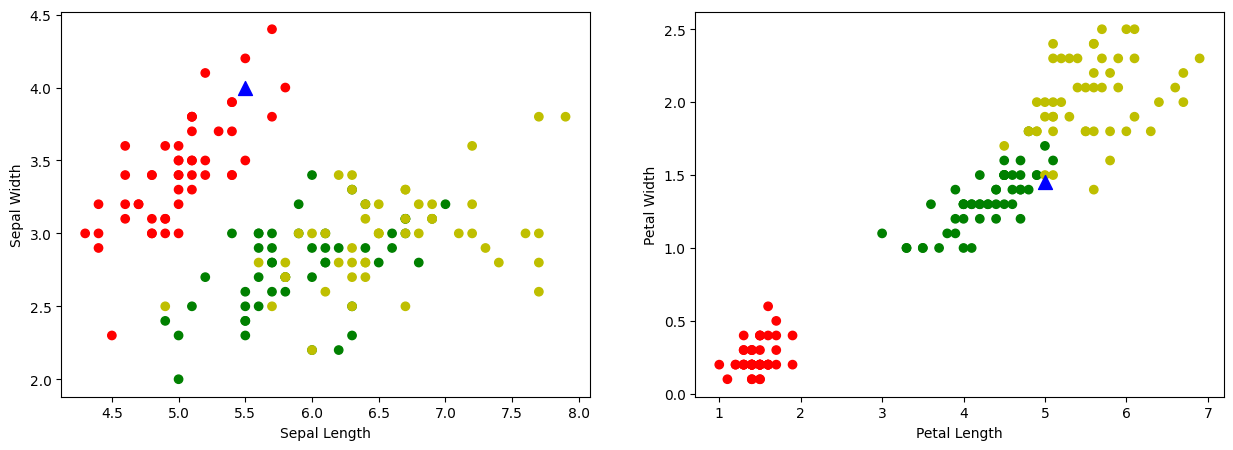

In [2]:
# 示範:使用執行結果的圖案中，利用花萼(sepal)與花瓣(petal)的長度與寬度來預測新的值是屬於哪一種鳶尾花(Iris)
# 以預測的點 (藍色三角形) 距離最近的 k個鄰居，來預測此點是屬於哪一類

import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
print(X)
X.columns = ["sepal_length","sepal_width","petal_length","petal_width"]
target = pd.DataFrame(iris.target, columns=["target"])
y = target["target"]

colmap = np.array(["r", "g", "y"])
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace = .5)
plt.scatter(X["sepal_length"], X["sepal_width"], color=colmap[y])  
plt.scatter(5.5, 4, s=100, marker='^', c='blue');   
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1, 2, 2)
plt.scatter(X["petal_length"], X["petal_width"], color=colmap[y])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(5, 1.45, s=100, marker='^', c='blue');   
plt.show()

## 1.3 Calculation of distance

<img src = "images/distance.png" width = 600 height = 300>

## 1.4 Algorithm of KNN

- Step-1: Select the number K.  
- Step-2: Calculate the distance (eg. Euclidean distance) between the targeted node and all rest nodes 
- Step-3: Take the K nearest neighbors as per the calculated distance.
- Step-4: Among these k neighbors, count the number of the data points in each category.
- Step-5: Assign the new data points to that category for which the number of the neighbor is maximum.


- https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

# 2. KNN in scikit learn

## 2.1 sklearn.neighbors.KNeighborsClassifier( )

### 2.1.1 Steps of KNeighborsClassifier( )

1. Generate a KNN object 
    - knn = neighbors.KNeighborsClassifier(n_neighbors=k)

2. Tran the model
    - knn.fit(X, y)
    
3. Predict new data
    - knn.predict(New data)
        - New data can be types of 2-way DataFrames (Pandas), ndarray (Numpy), or list (python)

In [4]:
# Classify the quality of tissues: according to the acid resistance and strength of the tissues
# 1: good; 0: bad


import pandas as pd
import numpy as np
from sklearn import neighbors

X = pd.DataFrame({
   "durability": [7, 7, 3, 1],
   "strength":   [7, 4, 4, 4]
})
# print(X)
y = np.array([0, 0, 1, 1])
k = 3

knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# prediction
new_tissue = pd.DataFrame(np.array([[3, 7]]))  #  DataFrame
pred = knn.predict(new_tissue)
print(pred)

new_tissue = np.array([[3, 7]])    # ndarray
pred = knn.predict(new_tissue)
print(pred)

new_tissue =[[3, 7]]     # replaced by list
pred = knn.predict(new_tissue)
print(pred)


   durability  strength
0           7         7
1           7         4
2           3         4
3           1         4
[1]
[1]
[1]


/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/Users/jenny/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [3]:
# cannot predict with new types of a number or one-way list

pred = knn.predict([[5, 4]])
print(pred)

pred = knn.predict(5, 4) # error
print(pred)

pred = knn.predict([5, 4]) # error
print(pred)

[0]


TypeError: predict() takes 2 positional arguments but 3 were given

### 2.1.2 Parameters of KNeighborsClassifier( )

- Syntax
    - class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None, **kwargs)
    
* Parameters
    * n_neighbors：value of k, default is 5
    * algorithm：
        - ‘ball_tree’ will use BallTree
        - ‘kd_tree’ will use KDTree
        - ‘brute’ will use a brute-force search.
        - ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
        
        
    * p value:default is 2
        * p=1  
            - Manhattan distance
        * p=2
            - Euclidean distance
  
- document
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
    - https://scikit-learn.org/0.15/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [4]:
# check paremeters

import pandas as pd
import numpy as np
from sklearn import neighbors

X = [[7,7], [7, 4], [3,4], [1,4]]  # replaced by list

y = [0, 0, 1, 1]    # replaced by list
k = 3

knn1 = neighbors.KNeighborsClassifier(n_neighbors=k)
print(knn1.metric)
knn1.fit(X, y)
print('p:', knn1.p)
print('use euclidean_distance')

print()
knn2 = neighbors.KNeighborsClassifier(n_neighbors=k, p = 1)
print(knn2.metric)
knn2.fit(X, y)
print('p:', knn2.p)
print('use manhattan_distance')

minkowski
p: 2
use euclidean_distance

minkowski
p: 1
use manhattan_distance


### 2.1.3 Get the k-nearest nodes

- Syntax
    - kneighbors(X=None, n_neighbors=None, return_distance=True)
    
- Parameters    
    - return_distance: if return the distanses of the k nodes
        - return_distance=False
            - Return the indexes of the k nodes
                - eg.  [[16 20 48  6 23]]
                   - indexes are sorted by the distance
            - Get the features of the k-nearest nodes(X is all samples)
                - X[neighbors[0]]
        -  return_distance=True
            - Return the distances and indexes of the k nodes
                - eg. (array([[0.97169784, 1.0395278 , 1.05701703, 1.05893391, 1.08106267]]), array([[16, 20, 48,  6, 23]], dtype=int64))
            - Get the distances of the k-nearest nodes
                    - X[neighbors[0]]
            - Get the features of the k-nearest nodes
                    X[neighbors[1]]


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
X =  np.array([[ 1.59652373,  1.7842681],
 [-1.08033247,  2.88161526],
 [-2.20874729,  2.09380938],
 [ 2.68364041,  1.25910451],
 [-1.54337736,  2.07300501],
 [ 1.45562098,  2.03116724],
 [ 1.02188099,  2.27766935],
 [-1.90703154,  2.22689751],
 [ 0.36844762,  4.553324  ],
 [-0.24817139,  3.55152711],
 [-1.26182559,  2.72142791],
 [-2.53267145,  0.81152212],
 [-0.762291,    4.58163802],
 [ 0.12496499,  4.58598342],
 [-0.24190617,  4.73346704],
 [ 0.56835118,  3.90699394],
 [-0.94156859,  2.24009433],
 [-2.06193131,  2.2463591 ],
 [-1.10355256,  1.87690504],
 [-1.91357386,  2.8725641 ],
 [ 1.03166129,  1.87235583],
 [ 1.69420869,  1.73715542],
 [ 0.00630001,  5.0715223 ],
 [-0.63814723,  1.1273806 ],
 [-1.41275721,  3.34453592],
 [ 0.97623789,  3.17046524],
 [ 0.89295132,  5.13753351],
 [-1.73368206,  2.2002046 ],
 [-1.97254489,  1.88768969],
 [ 1.12989042,  3.19134456],
 [ 1.12053538,  4.54362679],
 [-0.70387404,  5.16617271],
 [ 1.51211223,  0.96423044],
 [ 0.07614726,  4.24119362],
 [ 1.69351692,  1.29162069],
 [ 0.27939746,  3.07825379],
 [-0.64245157,  4.63267104],
 [ 1.47752171,  1.6526902 ],
 [-1.81215938,  1.48754256],
 [ 1.81306848,  2.03369921],
 [ 2.43745434,  2.07738975],
 [-1.42994695,  1.90918568],
 [ 1.61940674,  1.7823553 ],
 [-0.51673541,  5.14603897],
 [ 1.24832278,  2.46649421],
 [ 1.46272006,  2.2321415 ],
 [-2.23239609,  1.81861835],
 [ 1.98309066,  2.25699912],
 [-0.87946521,  1.41363327],
 [-0.16080202,  4.48147384],
 [ 0.21381984,  4.4239439 ],
 [ 2.03991033,  2.18148314],
 [ 2.24140498,  1.58911395],
 [ 0.70726774,  3.8920451 ],
 [ 1.15376522,  4.88830887],
 [-3.53179389,  2.39217116],
 [ 1.37086822,  1.14798924],
 [-0.6990899,   4.54049589],
 [-1.48133828,  1.55470099],
 [ 2.10645569,  1.75893144]])

y =  np.array([1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 2,
 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1])

In [7]:
from sklearn.neighbors import KNeighborsClassifier
# 模型
k = 5
clf = KNeighborsClassifier(n_neighbors=k)  
clf.fit(X, y);   
print(X)
print(X.shape)

[[ 1.59652373  1.7842681 ]
 [-1.08033247  2.88161526]
 [-2.20874729  2.09380938]
 [ 2.68364041  1.25910451]
 [-1.54337736  2.07300501]
 [ 1.45562098  2.03116724]
 [ 1.02188099  2.27766935]
 [-1.90703154  2.22689751]
 [ 0.36844762  4.553324  ]
 [-0.24817139  3.55152711]
 [-1.26182559  2.72142791]
 [-2.53267145  0.81152212]
 [-0.762291    4.58163802]
 [ 0.12496499  4.58598342]
 [-0.24190617  4.73346704]
 [ 0.56835118  3.90699394]
 [-0.94156859  2.24009433]
 [-2.06193131  2.2463591 ]
 [-1.10355256  1.87690504]
 [-1.91357386  2.8725641 ]
 [ 1.03166129  1.87235583]
 [ 1.69420869  1.73715542]
 [ 0.00630001  5.0715223 ]
 [-0.63814723  1.1273806 ]
 [-1.41275721  3.34453592]
 [ 0.97623789  3.17046524]
 [ 0.89295132  5.13753351]
 [-1.73368206  2.2002046 ]
 [-1.97254489  1.88768969]
 [ 1.12989042  3.19134456]
 [ 1.12053538  4.54362679]
 [-0.70387404  5.16617271]
 [ 1.51211223  0.96423044]
 [ 0.07614726  4.24119362]
 [ 1.69351692  1.29162069]
 [ 0.27939746  3.07825379]
 [-0.64245157  4.63267104]
 

In [8]:
# return_distance=False

import pandas as pd

from sklearn.neighbors import KNeighborsClassifier

k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X, y);   # 建立模型

X_sample = [[0, 2]]

y_sample = clf.predict(X_sample)
print(y_sample)
neighbors = clf.kneighbors(X_sample, return_distance=False)
print('\nthe indexes of 5 nearest nodes:\n', neighbors)
print('\nthe features of 5 nearest nodes:\n',X[neighbors[0]])

[0]

the indexes of 5 nearest nodes:
 [[16 20 48  6 23]]

the features of 5 nearest nodes:
 [[-0.94156859  2.24009433]
 [ 1.03166129  1.87235583]
 [-0.87946521  1.41363327]
 [ 1.02188099  2.27766935]
 [-0.63814723  1.1273806 ]]


In [9]:
import pandas as pd

X_sample = [[0, 2]]

y_sample = clf.predict(X_sample);   
neighbors = clf.kneighbors(X_sample, return_distance=True);  
print('\nthe 5 nearest nodes:\n', neighbors)
print('\nthe distances of 5 nearest nodes:\n', neighbors[0])
print('\nthe indexes of 5 nearest nodes:\n', neighbors[1])

print('\nthe features of 5 nearest nodes:\n',X[neighbors[1]])



the 5 nearest nodes:
 (array([[0.97169784, 1.0395278 , 1.05701703, 1.05893391, 1.08106267]]), array([[16, 20, 48,  6, 23]]))

the distances of 5 nearest nodes:
 [[0.97169784 1.0395278  1.05701703 1.05893391 1.08106267]]

the indexes of 5 nearest nodes:
 [[16 20 48  6 23]]

the features of 5 nearest nodes:
 [[[-0.94156859  2.24009433]
  [ 1.03166129  1.87235583]
  [-0.87946521  1.41363327]
  [ 1.02188099  2.27766935]
  [-0.63814723  1.1273806 ]]]


In [104]:
hh = [[2,1], [3,5]]
# print(hh[1,1])
print(hh[1][1])


5


In [15]:
# Check the default distance is Manhattan distance or Euclidien distance

import pandas as pd
import math


from sklearn.neighbors import KNeighborsClassifier

k = 5
clf = KNeighborsClassifier(n_neighbors=k)  
clf.fit(X, y);   

X_sample = [[0, 2]]

y_sample = clf.predict(X_sample);   
neighbors = clf.kneighbors(X_sample, return_distance=True);   
print('\nthe indexes of 5 nearest nodes:\n', neighbors[1])
print('\nthe features of 5 nearest nodes:\n',X[neighbors[1]])

print('\ndistances calculated by programming:', neighbors[0])

dists_E = []  # Manhattan distance
for i in range(5):
    dist = abs(X[neighbors[1]][0][i][0]- X_sample[0][0]) + abs(X[neighbors[1]][0][i][1]- X_sample[0][1])
    dists_E.append(dist)
print('\nManhattan distance:', dists_E)

dists_M = []  # Euclidien distance
for i in range(5):
    dist = math.sqrt((X[neighbors[1]][0][i][0]- X_sample[0][0])**2 + (X[neighbors[1]][0][i][1]- X_sample[0][1])**2)
    dists_M.append(dist)
print('\nEuclidien distance:', dists_M)


the indexes of 5 nearest nodes:
 [[16 20 48  6 23]]

the features of 5 nearest nodes:
 [[[-0.94156859  2.24009433]
  [ 1.03166129  1.87235583]
  [-0.87946521  1.41363327]
  [ 1.02188099  2.27766935]
  [-0.63814723  1.1273806 ]]]

distances calculated by programming: [[0.97169784 1.0395278  1.05701703 1.05893391 1.08106267]]

Manhattan distance: [1.18166292, 1.15930546, 1.46583194, 1.2995503400000001, 1.51076663]

Euclidien distance: [0.9716978424246587, 1.0395278021387657, 1.0570170280800764, 1.0589339099551034, 1.081062673674858]


In [14]:
# Check the default distance is Manhattan distance or Euclidien distance if set p = 2

import pandas as pd
import math

from sklearn.neighbors import KNeighborsClassifier

k = 5
clf = KNeighborsClassifier(n_neighbors=k, p = 1)  
clf.fit(X, y);  

X_sample = [[0, 2]]

y_sample = clf.predict(X_sample);   
neighbors = clf.kneighbors(X_sample, return_distance=True);   
print('\nthe indexes of 5 nearest nodes:\n', neighbors[1])
print('\nthe features of 5 nearest nodes:\n',X[neighbors[1]])

print('\ndistances:', neighbors[0])

dists_E = []  # Manhattan distance
for i in range(5):
    dist = abs(X[neighbors[1]][0][i][0]- X_sample[0][0]) + abs(X[neighbors[1]][0][i][1]- X_sample[0][1])
    dists_E.append(dist)
print('\nManhattan distance:', dists_E)

dists_M = []  # Euclidien distance
for i in range(5):
    dist = math.sqrt((X[neighbors[1]][0][i][0]- X_sample[0][0])**2 + (X[neighbors[1]][0][i][1]- X_sample[0][1])**2)
    dists_M.append(dist)
print('\nEuclidien distance:', dists_M)

print(abs(1.03166129-X_sample[0][0]) + abs(1.87235583-X_sample[0][1]))



the indexes of 5 nearest nodes:
 [[20 16 18  6 35]]

the features of 5 nearest nodes:
 [[[ 1.03166129  1.87235583]
  [-0.94156859  2.24009433]
  [-1.10355256  1.87690504]
  [ 1.02188099  2.27766935]
  [ 0.27939746  3.07825379]]]

distances: [[1.15930546 1.18166292 1.22664752 1.29955034 1.35765125]]

Manhattan distance: [1.15930546, 1.18166292, 1.22664752, 1.2995503400000001, 1.3576512500000002]

Euclidien distance: [1.0395278021387657, 0.9716978424246587, 1.1103966056594172, 1.0589339099551034, 1.1138645233168243]
1.15930546


## 2.2 Simulation & figures

### 2.2.1 make_blobs( )

- Function:Generate isotropic Gaussian blobs for clustering

- Syntax
    - sklearn.datasets.make_blobs(n_samples=100, n_features=2, *, centers=None, cluster_std=1.0, center_box=(- 10.0, 10.0), shuffle=True, random_state=None, return_centers=False

- References
    - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
    - https://www.itread01.com/content/1547228537.html

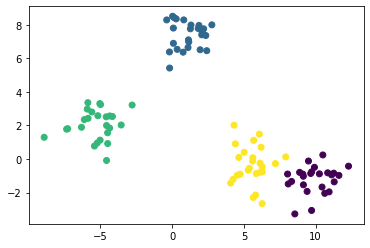

In [18]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot

data, label = make_blobs(n_samples=100, n_features=2, centers=4)

pyplot.scatter(data[:, 0], data[:, 1], c=label)
pyplot.show()

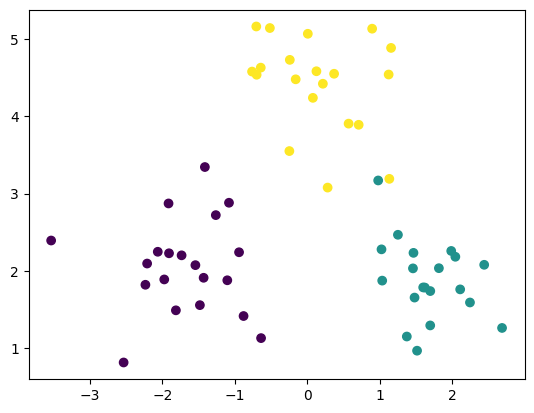

X:
 [[ 1.59652373  1.7842681 ]
 [-1.08033247  2.88161526]
 [-2.20874729  2.09380938]
 [ 2.68364041  1.25910451]
 [-1.54337736  2.07300501]
 [ 1.45562098  2.03116724]
 [ 1.02188099  2.27766935]
 [-1.90703154  2.22689751]
 [ 0.36844762  4.553324  ]
 [-0.24817139  3.55152711]
 [-1.26182559  2.72142791]
 [-2.53267145  0.81152212]
 [-0.762291    4.58163802]
 [ 0.12496499  4.58598342]
 [-0.24190617  4.73346704]
 [ 0.56835118  3.90699394]
 [-0.94156859  2.24009433]
 [-2.06193131  2.2463591 ]
 [-1.10355256  1.87690504]
 [-1.91357386  2.8725641 ]
 [ 1.03166129  1.87235583]
 [ 1.69420869  1.73715542]
 [ 0.00630001  5.0715223 ]
 [-0.63814723  1.1273806 ]
 [-1.41275721  3.34453592]
 [ 0.97623789  3.17046524]
 [ 0.89295132  5.13753351]
 [-1.73368206  2.2002046 ]
 [-1.97254489  1.88768969]
 [ 1.12989042  3.19134456]
 [ 1.12053538  4.54362679]
 [-0.70387404  5.16617271]
 [ 1.51211223  0.96423044]
 [ 0.07614726  4.24119362]
 [ 1.69351692  1.29162069]
 [ 0.27939746  3.07825379]
 [-0.64245157  4.6326710

In [11]:
# revised by Lai
from sklearn.datasets import make_blobs
from matplotlib import pyplot

centers = [[-2, 2], [2, 2], [0, 4]]
X, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)

pyplot.scatter(X[:, 0], X[:, 1], c=y)
pyplot.show()

print('X:\n', X)
print('\ny:\n', y)

### 2.2.2 KNN figures

<class 'numpy.ndarray'>
X.shape: (60, 2)
y:
 [1 0 0 1 0 1 1 0 2 2 0 0 2 2 2 2 0 0 0 0 1 1 2 0 0 1 2 0 0 2 2 2 1 2 1 2 2
 1 0 1 1 0 1 2 1 1 0 1 0 2 2 1 1 2 2 0 1 2 0 1]


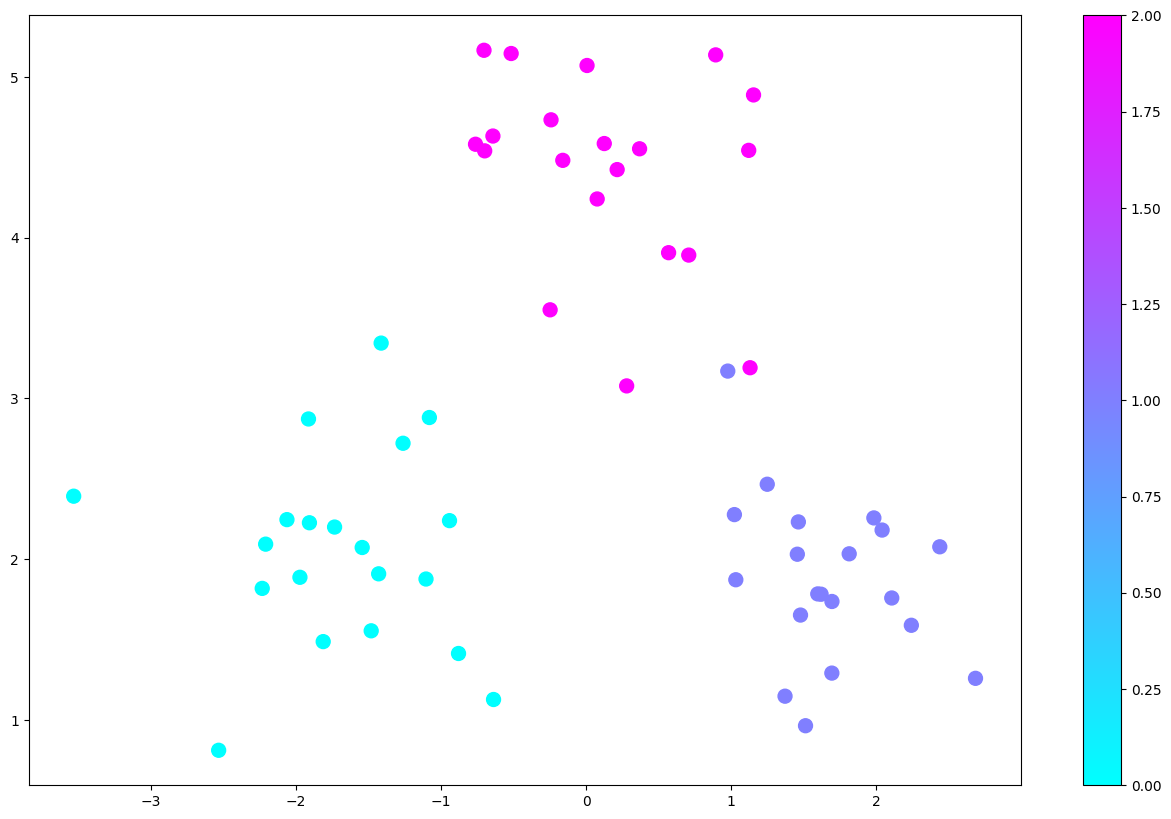

In [14]:
# revised by Lai

from sklearn.datasets import make_blobs

centers = [[-2, 2], [2, 2], [0, 4]]
X, y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)


plt.figure(figsize=(16, 10))
c = np.array(centers)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool');         

plt.colorbar()   

print(type(X))
print('X.shape:', X.shape)
print('y:\n', y)

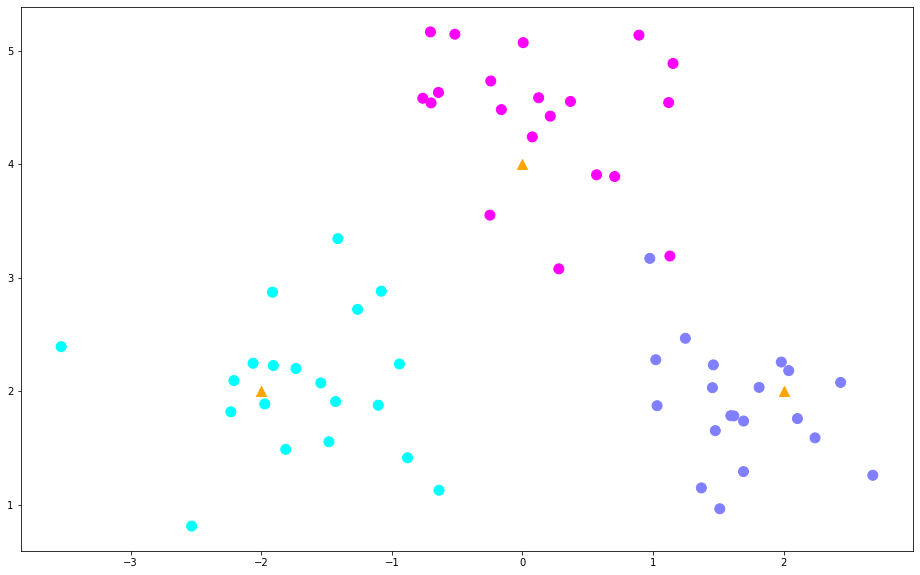

In [161]:
# centers of clusters

plt.figure(figsize=(16, 10))
c = np.array(centers)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool');         

plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='orange');   # centers of clusters

In [19]:
import pandas as pd

X_sample = [[0, 2]]

y_sample = clf.predict(X_sample);   
neighbors = clf.kneighbors(X_sample, return_distance=False);   
print('\nthe 5 nearest nodes:\n', neighbors)
print('\nFeatures of the 5 nearest nodes:\n',X[neighbors[0]])



the 5 nearest nodes:
 [[16 20 48  6 23]]

Features of the 5 nearest nodes:
 [[-0.94156859  2.24009433]
 [ 1.03166129  1.87235583]
 [-0.87946521  1.41363327]
 [ 1.02188099  2.27766935]
 [-0.63814723  1.1273806 ]]


### reshape( ) 

- reshape(n, -1)：provide the number of row, calculate the number of column automatically
    -b = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(4,-1)  
    - get an array of (4,2)  
- reshape(-1, n)  
    - b = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1,2)  
    - get an array of (4,2) 

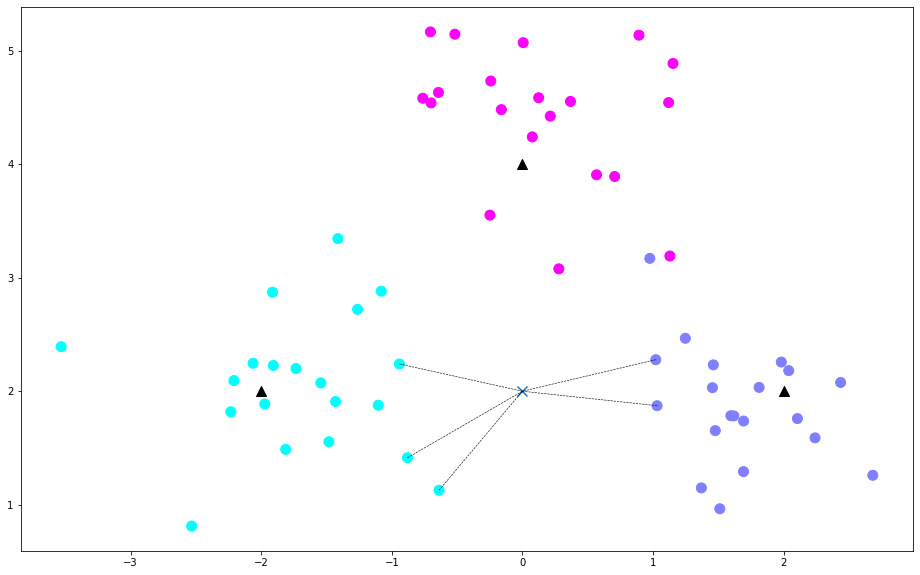

In [163]:
# Figure
plt.figure(figsize=(16, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='cool')    
plt.scatter(c[:, 0], c[:, 1], s=100, marker='^', c='k')   # Central nodes
plt.scatter(X_sample[0][0], X_sample[0][1], marker="x", 
            s=100, cmap='cool')    

for i in neighbors[0]:
    # Connect the targeted node and the 5 nearest nodes
    plt.plot([X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]], 
             'k--', linewidth=0.6);

# 3. Verify accuracy of data

## 3.1 sklearn datasets

### A list of different types of datasets which are available as part of sklearn.datasets
- Iris (Iris plant datasets used – Classification)
- Boston (Boston house prices – Regression)
- Wine (Wine recognition set – Classification)
- Breast Cancer (Breast cancer wisconsin diagnostic – Classification)
- Digits (Optical recognition of handwritten digits dataset – Classification)
- Linnerud (Linnerrud dataset – Classification)
- Diabetes (Diabetes – Regression)

 ### - Load datasets 
    - from sklearn import datasets
    - iris = datasets.load_iris()
    - boston = datasets.load_boston()
    - breast_cancer = datasets.load_breast_cancer()
    - diabetes = datasets.load_diabetes()
    - wine = datasets.load_wine()
    - datasets.load_linnerud()
    - digits = datasets.load_digits()

### - Content of datasets
    - Data (to be used for training)
    - Labels (Target)
    - Labels attriibute
    - Description of the dataset

### - Accessing the value of above:
    - iris.data
    - iris.target
    - iris.target_names
    - print(iris.DESCR)

- https://vitalflux.com/how-use-sklearn-datasets-machine-learning/

In [21]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()

# OR
# from sklearn import datasets
# iris = datasets.load_iris()


iris   # display content of the iris dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [23]:
print(iris.keys())
print('\ndata shape:\n', iris.data.shape)
print('\n target:\n', iris.target)     
print('\n target_names:\n', iris.target_names)  
print('\nDescribe:\n', iris.DESCR)    


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

data shape:
 (150, 4)

 target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

 target_names:
 ['setosa' 'versicolor' 'virginica']

Describe:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
  

In [34]:
print('\nType of data:\n', type(iris.data))
print('\ndata:\n', iris.data)


Type of data:
 <class 'numpy.ndarray'>

data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [

## 3.2 Accuracy

### score( ) method 
- Calculate the mean accuracy for the test data.
- Syntax
    - xxx.score(X_test,y_test)

In [29]:
# Use 4 features to predict iris flowers

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data
y = iris.target

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)   

print(knn.score(X, y))  # accuracy
print()

# manually calculate
predict_y = knn.predict(X)
print('Predicted y:\n', predict_y)    
print('\nPredicted category:\n', iris.target_names[predict_y])  

print('\nActual y:\n', y)          
print('\nActual category:\n', iris.target_names[y])  

mask = predict_y == y         
print('\nCorrect?\n', mask)
print('\nCorrect number:', sum(mask), ',Total number:', len(mask))
print('\nCorrect rate:', sum(mask)/len(mask))

0.9666666666666667

Predicted y:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Predicted category:
 ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolo

### Compare accuracies from different features 

sepal length, sepal width, petal length, petal width

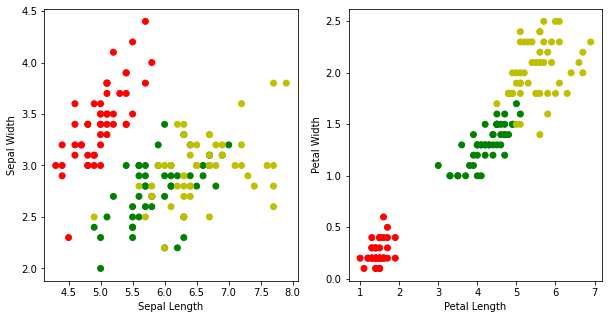


由上圖也可以看出: petal length (cm)', 'petal width (cm)'與 target的相關係數最高，最適合來做分類的特徵


In [169]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.columns = ["sepal_length","sepal_width","petal_length","petal_width"]
target = pd.DataFrame(iris.target, columns=["target"])
y = target["target"]

colmap = np.array(["r", "g", "y"])
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace = .5)
plt.scatter(X["sepal_length"], X["sepal_width"], color=colmap[y])  
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.subplot(1, 2, 2)
plt.scatter(X["petal_length"], X["petal_width"], color=colmap[y])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()


In [32]:
# Features: petal length, petal width

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data[:,2:]    # petal length, petal width
y = iris.target
print(X.shape)

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)   
print(knn.score(X, y)) 
print()

predict_y = knn.predict(X)
print('Predicted:\n', predict_y)    
# print('\nPredicted category:\n', iris.target_names[predict_y])  # 預測的鳶尾花的類別

print('\nActual y:\n', y)          


mask = predict_y == y          
print('\nCorrect?\n', mask)
print('\nCorrect number:', sum(mask))
print('\nCorrect rate:\n', sum(mask)/len(mask))



(150, 2)
0.96

Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Actual y:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Correct?
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  Tr

In [33]:
# sepal length, sepal width
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X = iris.data[:,:2]    # Features: sepal length, sepal width
y = iris.target
print(X.shape)
print()

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)   
print(knn.score(X, y)) 

predict_y = knn.predict(X)
print('Predicted:\n', predict_y)    
# print('\nPredicted category:\n', iris.target_names[predict_y])  

print('\nActual y:\n', y)          


mask = predict_y == y          
print('\nCorrect?\n', mask)
print('\nCorrect number:', sum(mask))
print('\nCorrect rate:\n', sum(mask)/len(mask))

(150, 2)

0.8333333333333334
Predicted:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 2 2 1 2 1 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 2
 2 1]

Actual y:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Correct?
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True False False False  

# 4. Model creation & prediction

## 4.1 Training data & testing data

- Use training data to generate a good model
- Use testing data to test the accuracy of the model

- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

- data type of X_train is numpy.ndarray


- https://datagy.io/sklearn-train-test-split/

In [38]:
# 33% testing data，67% training data

from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target
print('y:\n', y)
print('\niris.target_names:\n', iris.target_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print('\nshape:\n', X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print('\ndata type:\n', type(X_train))

print('\nfirst 5 X_train data:\n', X_train[:5, ])    # ndarray cannot use pandas.DataFrame.head()
print('\ntype of X_train:\n', type(X_train))


y:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

iris.target_names:
 ['setosa' 'versicolor' 'virginica']

shape:
 (100, 4) (50, 4) (100,) (50,)

data type:
 <class 'numpy.ndarray'>

first 5 X_train data:
 [[5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]]

type of X_train:
 <class 'numpy.ndarray'>


In [40]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)   #

predict_y_test = knn.predict(X_test)
print('Predicted y:\n', predict_y_test)   


print('\nActual y:\n', y_test)          

mask = predict_y_test == y_test          
print('\nCoreect?\n', mask)
print('\ncorrect rate:', sum(mask)/len(mask))

print(knn.score(X_test, y_test))         

Predicted y:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1 2 0 0 0 1]

Actual y:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1]

Coreect?
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True]

correct rate: 0.98
0.98


In [181]:
# Predict new data

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)   

new_x = np.array([[3, 3, 2, 2]]) 
predict_y = knn.predict(new_x)
print(predict_y)      
print(iris.target_names[predict_y]) 


[0]
['setosa']


## 4.2 Choice of K value

### find an optimal value of K to enhance accuracy

[1.0, 0.98, 0.95, 0.95, 0.96, 0.97, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.98, 0.97, 0.98, 0.98, 0.98, 0.97, 0.98, 0.98]
[1.0, 0.98, 0.98, 0.98, 0.98, 0.98, 1.0, 1.0, 1.0, 1.0, 0.98, 1.0, 0.98, 1.0, 1.0, 1.0, 0.98, 0.98, 0.98, 0.98]



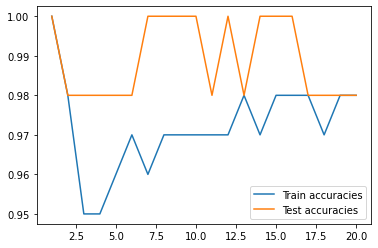

In [43]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import neighbors 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.columns = ["sepal_length","sepal_width","petal_length","petal_width"]
target = pd.DataFrame(iris.target, columns=["target"])
y = target["target"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33,
                                                random_state=1)

Ks = np.arange(1, round(0.2*len(XTrain) + 1))
accuracies_train=[]
accuracies_test = []
for k in Ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    accuracy_train = knn.score(XTrain, yTrain)
    accuracies_train.append(accuracy_train)
    accuracy_test = knn.score(XTest, yTest)
    accuracies_test.append(accuracy_test)

print(accuracies_train)
print(accuracies_test)
print()
plt.plot(Ks, accuracies_train, label = 'Train accuracies')
plt.plot(Ks, accuracies_test, label = 'Test accuracies')
plt.legend()
plt.show()




# 5. K-fold Cross Validation

<img src = "images/k_fold.jpg" width = 300, height= 250>


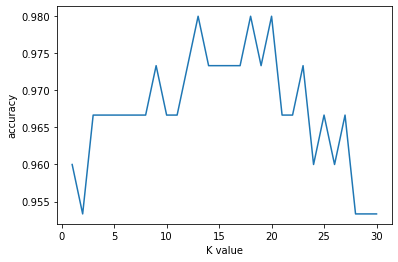

In [44]:
# k-fold cross validation

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import neighbors 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.columns = ["sepal_length","sepal_width","petal_length","petal_width"]
target = pd.DataFrame(iris.target, columns=["target"])
y = target["target"]

Ks = np.arange(1, round(0.2*len(X) + 1))
accuracies=[]
for k in Ks:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, scoring="accuracy",
                            cv=10)
    accuracies.append(scores.mean())

plt.plot(Ks, accuracies)
plt.xlabel("K value")
plt.ylabel("accuracy")
plt.show()


# Conclusions: We can get the most accuracies when K is between 12 and 18.


### Reference


- 柯博文 人工智慧與大數據
- 高揚（2017）。白話大數據與機器學習。台北：碁峰。（有python的範例）
- 陳允傑（2018）。Python資料科學與人工智慧應用實務。台北：旗標。（有投影片和python程式）
- 黃永昌（2019）。打下最紮實的AI基礎：從scikit-learn：一步一腳印。台北：佳魁數位。
- https://killer0001.blogspot.com/2018/10/1-scikit-learn-kneighbors-iris-dataset.html#

- https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning
- https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

- pyinvest
- https://pyecontech.com/
- https://www.youtube.com/watch?v=tfGuRVTwxq8